İlk önce Thompson Örneklemesini tanıyalım..

1.Adım: Her aksiyon için aşağıdaki iki sayıyı hesaplayanız.

Ni1(n): o ana kadar ödül olarak 1 gelme sayısı

Ni0(n): o ana kadar ödül olarak 0 gelme sayısı


2.Adım: Her reklam için aşağıda verilen Beta dağılımından rastgele sayı üretiyoruz.


3.Adım: Max beta değerini alıyordu.



VEEE UCB çok benziyor. O yüzden o koddan yardım alıcaz.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

In [76]:
veriler = pd.read_csv('C:/Users/yusuf/Desktop/GOALS/MACHINE LEARNING/Basic/kaynaklar/Ads_CTR_Optimisation.csv')

veriler.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [77]:
veriler.values

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

Yapacağımız işlemler şunlar olacaktır.

1 ADIM : Her turda (tur sayısı burada n olsun) her reklam altrenatifi(i) aşağıdaki sayılarda tutulur.

Ni: i sayılı reklamın o ana kadarki tıklama sayısı

Ri: o ana kadar ki i reklamından gelen 1 ve 0 'ların yani ödüllerin toplamı..





2.ADIM: Yukaruda bu iki sayıdan aşağıdaki değerler hesaplanır.

O ana kadar ki her reklamın ortalama ödülü Ri/Ni

GÜVEN ARALIĞI için aşağı ve yukarı oynama potansiyeli içinse √3log(n)/2Ni ifadesi hesaplanır.


n : tur sayısı
Ni: i sayılı reklamın o ana kadarki tıklanma sayısı



3.ADIM : MAX UCB DEĞERİ SAHİP OLAN ÖNEMLİ.


UCB= GÜVEN ARALIĞI + ORTALAMA


In [78]:
N=10000
#Ri için
toplamOdul=0 # toplam odul hesaplamak ve tanımlamak.
#Ni için
secilenler = []


#kaç tane birler ve sıfırlar için:
birler= [0] * 10     #UCB'den ayıran en önemli değişkenler
sıfırlar= [0] * 10
for n in range(1,N):
    ilan=0  # seçilen reklam 
    max_Th=0
    for i in range(0,10): #bu for'un amacı 10 tane reklamın içinde en yüksek olanı bul demek için kullandım.
        rasBeta=random.betavariate(birler[i] + 1,sıfırlar[i] + 1)
        if rasBeta>max_Th: #en yüksek beta değerine göre işlem yapılıyordu hatırlarsan
            max_Th= rasBeta
            ilan=i # sadece şeçilen ilanı baz alıyoruz.


    secilenler.append(ilan) #ilanların hepsini bir boş bir liste'de tutuyoruz.
    odul=veriler.values[n,ilan]
    if odul==1: #Eğer reklamdan gelen ödül 1 ise birleri artır.
        birler[ilan]+=1
    else:
        sıfırlar[ilan]+=1 

    toplamOdul= toplamOdul + odul

In [79]:
ilan

4

In [80]:
toplamOdul

2580

(array([ 152.,  131.,   53.,   66., 9104.,   26.,   34.,  347.,   60.,
          26.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

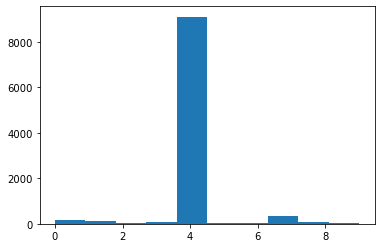

In [81]:
plt.hist(secilenler) #her bir ilandan ne kadar seçildiği 